# Импорт необходимых библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Разделение данных на обучение и валидацию
from sklearn.model_selection import train_test_split
# Метрика точности
from sklearn import metrics
# PCA
from sklearn.decomposition import PCA
# RF
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn import svm


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных

In [ ]:
# Загружаю размеченный датасет для обучения
train = pd.read_csv("train.csv")

In [ ]:
# Делю на признаки
X = train.drop(labels=['label'], axis=1)
# И целевую переменную
y = train['label']

# Проверяю, всё ли в порядке
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (42000, 784)
Shape of y: (42000,)


# Визуализация

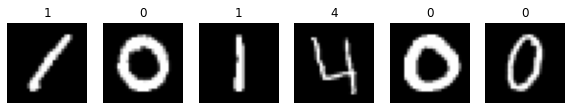

In [ ]:
# Визуализирую
N=6
fig, ax = plt.subplots(1, N, figsize=(10,10))
for i in range(N):
    image = X.iloc[i].values.reshape(28,28)
    label = y[i] 
    ax[i].imshow(image, cmap='gray')
    ax[i].title.set_text(label)
    ax[i].axis('off')
plt.show()

# Подготовка данных

In [ ]:
# Создаю словарь для хранения характеристик моделей
val_acc_score = dict()
# Разделяю размеченный датасет на данные для обучения и валидации
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# cПроверяю корректность разделения
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)


# Понижение размерности методом главных компонент

In [ ]:
# Создаю экземпляр класса PCA, сокращаю количество признаков с 784 до 100
pca = PCA(n_components=100)

# Обучаю на данных для обучения
pca.fit(X_train)

# Преобразую признаки данных для обучения путем понижения их размерности
pca_train = pca.transform(X_train)

# Преобразую признаки данных для валидации
pca_X_val_train = pca.transform(X_val)

# Первый классификатор - ближайший сосед с настройками по умолчанию, KNN

In [ ]:
# Создаю экземпляр класса KNN
knn = KNeighborsClassifier()
# Обучаю модель классификатора на данных с пониженной размерностью
knn_model = knn.fit(pca_train, y_train)

In [ ]:
# Рассчитываю точность на обучающей и валидационной выборках
y_pred_train_knn = metrics.accuracy_score(y_true=y_train, y_pred=knn_model.predict(pca_train))
y_pred_val_knn = metrics.accuracy_score(y_true=y_val, y_pred=knn_model.predict(pca_X_val_train))

# Добавляю в словарь для сравнения моделей значения валидационной точности
val_acc_score['KNN'] = round(y_pred_val_knn, 2)

print("Точность на обучении, KNN: ", y_pred_train_knn)
print("Точность на валидации, KNN:", y_pred_val_knn)

Точность на обучении, KNN:  0.9808928571428571
Точность на валидации, KNN: 0.9725


# Второй классификатор - лес деревьев решений, количество деревьев = 100, Random forest

In [ ]:
# Создаю экземпляр класса RF, содержащий 100 деревьев решений
rf = RandomForestClassifier(n_estimators = 100, random_state=1)

# Обучаю модель классификатора на данных с пониженной размерностью
rf_model = rf.fit(pca_train, y_train)

In [ ]:
# Рассчитываю точность на обучающей и валидационной выборках
y_pred_train_rf = metrics.accuracy_score(y_true=y_train, y_pred=rf_model.predict(pca_train))
y_pred_val_rf = metrics.accuracy_score(y_true=y_val, y_pred=rf_model.predict(pca_X_val_train))

# Добавляю в словарь для сравнения моделей значения валидационной точности
val_acc_score['RF'] = round(y_pred_val_rf, 2)

print("Точность на обучении, RF: ", y_pred_train_rf)
print("Точность на валидации, RF:", y_pred_val_rf)

Точность на обучении, RF:  1.0
Точность на валидации, RF: 0.9453571428571429


# Третий классификатор - метод опорных векторов с полиномиальным ядром, SVM poly

In [ ]:
# Создаю экземпляр класса SVM с полиномиальным ядром
svm = svm.SVC(kernel='poly')

# Обучаю модель классификатора на данных с пониженной размерностью
svm_model = svm.fit(pca_train, y_train)

In [ ]:
# Рассчитываю точность на обучающей и валидационной выборках
y_pred_train_svm = metrics.accuracy_score(y_true=y_train, y_pred=svm_model.predict(pca_train))
y_pred_val_svm = metrics.accuracy_score(y_true=y_val, y_pred=svm_model.predict(pca_X_val_train))

# Добавляю в словарь для сравнения моделей значения валидационной точности
val_acc_score['SVM'] = round(y_pred_val_svm, 2)

print("Точность на обучении, SVM: ", y_pred_train_svm)
print("Точность на валидации, SVM:", y_pred_val_svm)

Точность на обучении, SVM:  0.9952380952380953
Точность на валидации, SVM: 0.9794047619047619


# Выбор лучшей модели

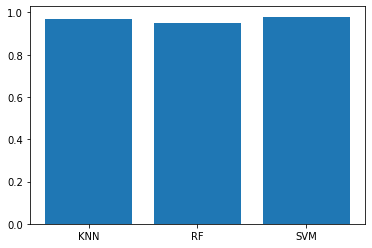

In [ ]:
# Визуализирую результат работы разных моделей
models = list(val_acc_score.keys())
accuracy = list(val_acc_score.values())

plt.bar(range(len(val_acc_score)), accuracy, tick_label=models)
plt.show()

# Загрузка результатов на Kaggle

In [ ]:
# Загрузка тестового набора данных
test_data = pd.read_csv('test.csv')

# Понижение размерности
pca_test_data = pca.transform(test_data)

# Проверка
print(pca_test_data.shape)

(28000, 100)


In [ ]:
# Предсказание лучшей моделью, сделанное на тестовых данных
y_predict = svm_model.predict(pca_test_data)

# Сборка файла для загрузки
prediction = pd.Series(y_predict, name='Label')

index_list = []

for i, item in enumerate(prediction):
    index_list.append(i+1)
    
image_id = pd.Series(index_list, name='ImageId')

submit = pd.concat([image_id, prediction], axis=1)

submit.to_csv('submission.csv', index=False)

submit.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


# Результаты

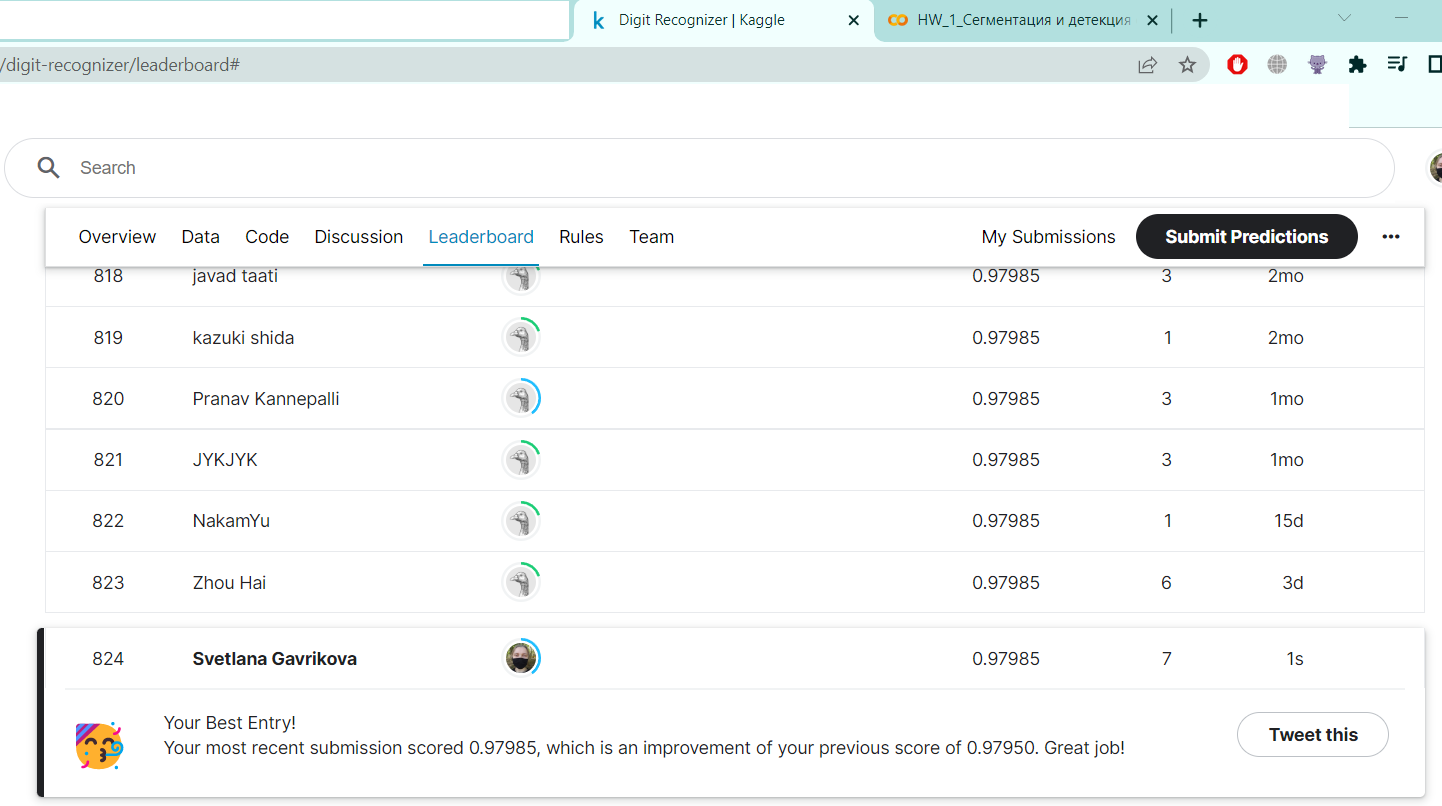